# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#https://drive.google.com/file/d/1evYscqQvK7GoxiyRKmNcHuYrpmudH3il/view
#healthcare topic: 3. Identifying Risk Factors Across Chronic Diseases: 



In [67]:

Kidney= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\Chronic_Kidney_Dsease_data.csv")
Diabetes= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\DiabetesHealthcare.csv")
Hypertension= pd.read_csv(r"C:\Users\cotil\OneDrive\Desktop\OMDS Mod B HW\Milestone 3 Datasets\hypertension_dataset.csv")

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [68]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))



Text(0, 0.5, 'Loss function')

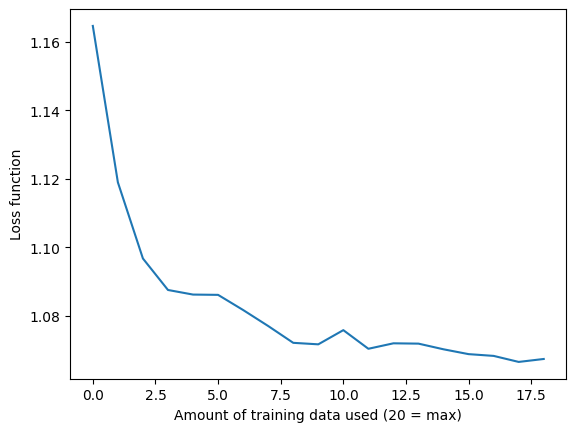

In [70]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [71]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

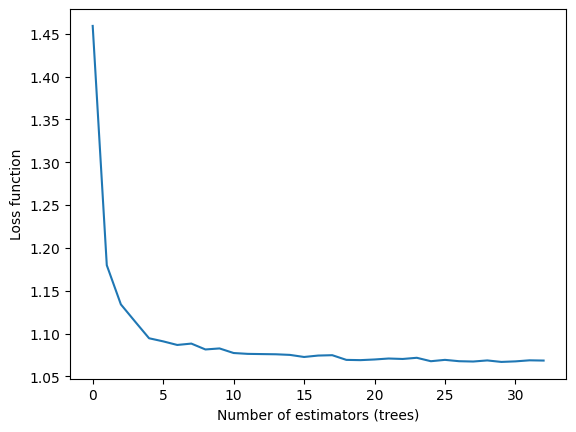

In [72]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

Based off of importance, I would cut the Number of estimators plot. The consistent negative trend implies of a steady and consistent correlatiion. However, the amount of training data used seems to have more data that fluctuates, making it more interesting for me.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [73]:
Hypertension.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [74]:
Diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [75]:
Kidney.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [76]:
Hypertension.dropna(inplace=True)
X_hyper = Hypertension.drop("Hypertension", axis=1)
y_hyper = Hypertension["Hypertension"]

X_hyper = pd.get_dummies(X_hyper, drop_first=True)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hyper, y_hyper, test_size=0.2, random_state=42, stratify=y_hyper)


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
from sklearn.model_selection import cross_val_score

# Use fewer folds (3 instead of 5)
cv_scores = cross_val_score(rf, X_hyper, y_hyper, cv=3, scoring='accuracy', n_jobs=-1)
print(f"Cross-validated Accuracy (3-fold): {cv_scores.mean():.4f}")

Cross-validated Accuracy (3-fold): 0.7188


In [80]:

from sklearn.model_selection import GridSearchCV

# Reduced grid to speed up search
param_grid = {
    'n_estimators': [100],         # Fixing to one reasonable value
    'max_depth': [None, 10],       # Just two depths
    'min_samples_split': [2],      # Fixing split threshold
    'min_samples_leaf': [1, 2]     # Two leaf sizes
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                          # Reduced from 5 to 3 folds
    scoring='accuracy',
    n_jobs=-1                      # Run in parallel
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [81]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.7188330428322428


c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Classification Report:
               precision    recall  f1-score   support

        High       0.72      1.00      0.84     25157
         Low       0.00      0.00      0.00      9840

    accuracy                           0.72     34997
   macro avg       0.36      0.50      0.42     34997
weighted avg       0.52      0.72      0.60     34997

Confusion Matrix:
 [[25157     0]
 [ 9840     0]]


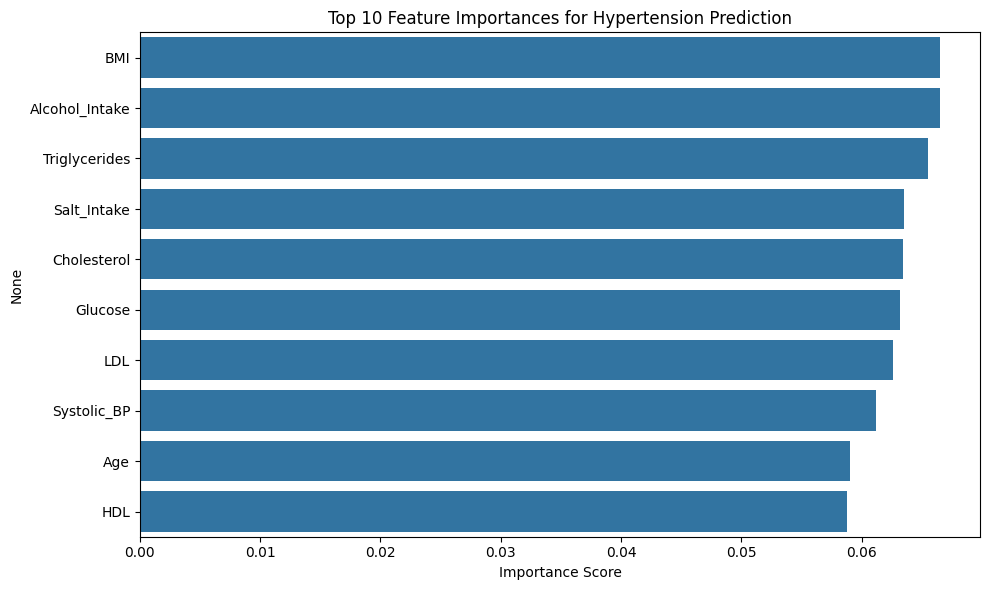

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances for Hypertension Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [83]:
print(y_diabetes.value_counts(normalize=True))

Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


In [84]:
Diabetes.dropna(inplace=True)

X_diabetes = Diabetes.drop("Diabetes_012", axis=1)
y_diabetes = Diabetes["Diabetes_012"]
X_diabetes = pd.get_dummies(X_diabetes, drop_first=True)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42, stratify=y_diabetes)



In [86]:
rf = RandomForestClassifier(random_state=42)

In [87]:
rf.fit(X_train, y_train)
cv_scores = cross_val_score(rf, X_diabetes, y_diabetes, cv=3, scoring='accuracy', n_jobs=-1)
print(f"Cross-validated Accuracy (3-fold): {cv_scores.mean():.4f}")


Cross-validated Accuracy (3-fold): 0.8418


In [88]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

In [89]:
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [90]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8480566067486597

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.60      0.10      0.18      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.36      0.37     50736
weighted avg       0.80      0.85      0.80     50736


Confusion Matrix:
 [[42285     0   456]
 [  879     0    47]
 [ 6327     0   742]]


c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [91]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Macro-averaged F1 score: {f1_macro:.4f}")

Macro-averaged F1 score: 0.3651


In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
Kidney = Kidney.dropna(subset=['Diagnosis'])

le = LabelEncoder()
for col in Kidney.columns:
    if Kidney[col].dtype == 'object':
        Kidney[col] = le.fit_transform(Kidney[col].astype(str))

X = Kidney.drop(columns=['Diagnosis'])
y = Kidney['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)



In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9186746987951807

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.46      0.50      0.48       332
weighted avg       0.84      0.92      0.88       332


Confusion Matrix:
 [[  0  27]
 [  0 305]]


c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\cotil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [94]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f}")

Cross-validated Accuracy: 0.9168


In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                    param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Accuracy: 0.9216867469879518

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07        27
           1       0.92      1.00      0.96       305

    accuracy                           0.92       332
   macro avg       0.96      0.52      0.52       332
weighted avg       0.93      0.92      0.89       332



# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

There is no graph to replicate in chapter seven of Storytelling with Data (165-185)